# Look into pMn in the Canada Basin

April, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

%matplotlib inline

Parameters:

In [2]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax-imin
jsize = jmax-jmin

# model result set:
folder_ref = '/data/brogalla/run_storage/Mn-reference-202103/'

year  = 2015
month = 7 # August

# colours:
c_dmn = '#fa8742'
c_pmn = '#579cdd'

Load files:

In [3]:
mask       = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask      = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask  = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 
e3t        = np.array(mask.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]
model_lons = np.array(mask.variables['nav_lon'])
model_lats = np.array(mask.variables['nav_lat'])

In [4]:
dMn_CB3 = np.array([[9.89505,7.01695359],
[24.7367,4.074367172],
[39.5773,3.203917868],
[57.3846,1.803593902],
[64.3092,1.758328843],
[98.9289,1.334041002],
[118.709,1.528175487],
[148.375,1.734083199],
[178.037,1.753798012],
[197.81,1.747613181],
[247.232,0.957648988],
[474.423,0.331293486],
[592.858,0.359338134],
[790.098,0.365897845],
[987.15,0.331800024],
[1184.02,0.269111157],
[1380.7,0.250814627],
[1577.19,0.214804831],
[1969.64,0.171546988],
[2459.18,0.152629949],
[2947.61,0.147058424],
[3434.95,0.148014942]])

In [5]:
pMn_CB3 = np.array([[9.89505,674.0952684],
[24.7367,853.3066816],
[57.3846,233.4047255],
[178.037,4841.507948],
[197.81,5127.15382],
[474.423,957.305716],
[790.098,840.4666579],
[1380.7,363.7459108],
[1969.64,444.9417019],
[2459.18,378.2499246],
[3434.95,379.0022695]])

Station locations:

In [6]:
def find_index_ANHA12_full(lons, lats, ANHA12_lon=model_lons, ANHA12_lat=model_lats):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    list_i = np.array([])
    list_j = np.array([])
    if isinstance(lons,float):
        i, j = ar.find_closest_model_point(lons, lats, ANHA12_lon, ANHA12_lat)
        list_i = i
        list_j = j
    else:
        for k in range(0,len(lons)):
            i, j = ar.find_closest_model_point(lons[k], lats[k], ANHA12_lon, ANHA12_lat)
            list_i = np.append(list_i, i)
            list_j = np.append(list_j, j)
    
    return list_i, list_j

In [7]:
Pb_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons      = Pb_data['station lon'].astype('float').dropna().values
lats      = Pb_data['Station lat'].astype('float').dropna().values

stnsi, stnsj = find_index_ANHA12_full(lons, lats)

In [8]:
CB2_coord = (0, int(stnsi[stn_names == 'CB2'])-imin, int(stnsj[stn_names == 'CB2'])-jmin)
CB3_coord = (0, int(stnsi[stn_names == 'CB3'])-imin, int(stnsj[stn_names == 'CB3'])-jmin)
CB4_coord = (0, int(stnsi[stn_names == 'CB4'])-imin, int(stnsj[stn_names == 'CB4'])-jmin)

Load monthly component contributions:

In [9]:
ncf  = nc.Dataset(f'{folder_ref}ref-{year}-202103/ANHA12_EXH006_1m_{year}0101_{year}1231_comp_{year}0{month}-{year}0{month}.nc')
dmn_sedice = np.array(ncf.variables['dmnsedice'])
dmn_atm    = np.array(ncf.variables['dmnatm'])
dmn_ice    = np.array(ncf.variables['dmnice'])

In [10]:
print(f'dMn from sediment in ice (moles per meter squared per second):')
print(f'- CB2 --- {dmn_sedice[CB2_coord]*e3t[CB2_coord]*1e3:.2e}')
print(f'- CB3 --- {dmn_sedice[CB3_coord]*e3t[CB3_coord]*1e3:.2e}')
print(f'- CB4 --- {dmn_sedice[CB4_coord]*e3t[CB4_coord]*1e3:.2e}')
print(f'dMn from dust from ice (moles per meter squared per second):')
print(f'- CB2 --- {dmn_ice[CB2_coord]*e3t[CB2_coord]*1e3:.2e}')
print(f'- CB3 --- {dmn_ice[CB3_coord]*e3t[CB3_coord]*1e3:.2e}')
print(f'- CB4 --- {dmn_ice[CB4_coord]*e3t[CB4_coord]*1e3:.2e}')
print(f'dMn from dust (moles per meter squared per second):')
print(f'- CB2 --- {dmn_atm[CB2_coord]*e3t[CB2_coord]*1e3:.2e}')
print(f'- CB3 --- {dmn_atm[CB3_coord]*e3t[CB3_coord]*1e3:.2e}')
print(f'- CB4 --- {dmn_atm[CB4_coord]*e3t[CB4_coord]*1e3:.2e}')

dMn from sediment in ice (moles per meter squared per second):
- CB2 --- 3.95e-11
- CB3 --- 2.45e-11
- CB4 --- 4.34e-12
dMn from dust from ice (moles per meter squared per second):
- CB2 --- 9.17e-15
- CB3 --- 3.06e-15
- CB4 --- 6.60e-15
dMn from dust (moles per meter squared per second):
- CB2 --- 2.59e-15
- CB3 --- 2.92e-15
- CB4 --- 3.60e-15


# See whether we can reproduce the pMn peak in the Canada Basin:

pMn peak magnitude (pmol L-1):
- CB4 = 2500 pmol L-1 = 2.5 nM
- CB3 = 5000 = 5 nM
- CB2 peak = 3000 = 3 nM

pMn average upper column magnitude (pmol L-1):
- CB4 = 400 = 0.4 nM
- CB3 = 1000 = 1 nM
- CB2 = 500 = 0.5 nM

pMn lower water column magnitude: all around 1400 pmol L- (1.4 nM)

In [61]:
depths_model = np.arange(0,1000,1)

dMn_start    = 4.5e-9*np.exp(-depths_model/50) + 1.6e-9
# dMn_start    = dMn_start + 0.5e-9*np.exp(-(depths_model-200)**2/(2*200))

# pMn_start    = 2.0e-9*np.exp(-(depths_model-200)**2/(2*200)) + 0.7e-9
# pMn_start    = 0.5e-9*np.exp(-(depths_model-200)**2/(2*200)) + 0.7e-9
pMn_start    = 0.6e-9*np.ones_like(depths_model)

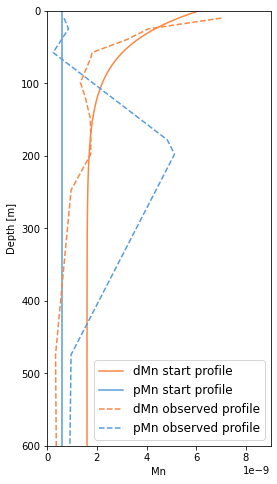

In [62]:
fig, ax = plt.subplots(1,1, figsize=(4,8))
ax.invert_yaxis()
ax.plot(dMn_start, depths_model, '-', c=c_dmn, label='dMn start profile')
ax.plot(pMn_start, depths_model, '-', c=c_pmn, label='pMn start profile')
ax.plot(dMn_CB3[:,1]*1e-9, dMn_CB3[:,0], '--', c=c_dmn, label='dMn observed profile')
ax.plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--', c=c_pmn, label='pMn observed profile')
ax.set_xlabel('Mn', fontsize=10)
ax.set_ylabel('Depth [m]', fontsize=10)
ax.set_xlim([0,9e-9])
ax.set_ylim([600,0])
ax.legend(fontsize=12)

Define constants:

In [63]:
timestepsize = 120 # seconds
k_ox         = 7.00e-7 # oxidation constant (s-1)
k_red        = 4.72e-7 # reduction constant (s-1)
s_ox         = 1.0/(3600*24) # sinking rate (m s-1)

# Photoreduction:
# CB2: kred photic is 12.32 * base rate
# CB3: kred photic is 7.107 * base rate
# CB4: kred photic is 4.798 * base rate
k_red_pho = k_red*7.10 # CB3

Functions:

In [156]:
def scavenging(dMn, pMn, opt_kox=(False, 1.0), opt_kred=(False, 1.0)):
    # Option: opt_kox:  oxidization rate (activate -- Boolean, multiplication rate -- Float)
    #         opt_kred: reduction rate   (activate -- Boolean, multiplication rate -- Float)
    
    ddMn_dt = np.zeros_like(dMn)
    dpMn_dt = np.zeros_like(pMn)
    
    # Photoreduction near the surface (upper 10 m)
    ddMn_dt[0:10] = -dMn[0:10]*k_ox + pMn[0:10]*k_red_pho
    dpMn_dt[0:10] = dMn[0:10]*k_ox - pMn[0:10]*k_red_pho

    # Reduction everywhere else
    ddMn_dt[10:] = -dMn[10:]*k_ox + pMn[10:]*k_red
    dpMn_dt[10:] = dMn[10:]*k_ox - pMn[10:]*k_red
    
    if opt_kox[0]:
        # Bacterial enhanced oxidation 
        k_ox_bacteria = (k_ox*opt_kox[1] - k_ox)*np.exp(-(depths_model-230)**2/(2*(50**2))) + k_ox # Gaussian change in k_ox across ~100-300 m depth
        
        ddMn_dt = -dMn*k_ox_bacteria + pMn*k_red
        dpMn_dt = dMn*k_ox_bacteria  - pMn*k_red

        # Photoreduction near the surface (upper 10 m)
        ddMn_dt[0:10] = -dMn[0:10]*k_ox_bacteria[0:10] + pMn[0:10]*k_red_pho
        dpMn_dt[0:10] = dMn[0:10]*k_ox_bacteria[0:10] - pMn[0:10]*k_red_pho
    elif opt_kred[0]:
        k_red_option = (k_red*opt_kred[1] - k_red)*np.exp(-(depths_model-230)**2/(2*(50**2))) + k_red  # Gaussian change in k_red across ~100-300 m depth
        
        ddMn_dt = -dMn*k_ox + pMn*k_red_option
        dpMn_dt = dMn*k_ox  - pMn*k_red_option
        
        # Photoreduction near the surface (upper 10 m)
        ddMn_dt[0:10] = -dMn[0:10]*k_ox + pMn[0:10]*k_red_pho
        dpMn_dt[0:10] = dMn[0:10]*k_ox  - pMn[0:10]*k_red_pho

    return ddMn_dt, dpMn_dt

if dpMn_dz is positive, pMn increases with depth, so the change in concentration should be small with sinking
if dpMn_dz is negative, pMn decreases with depth, so the change in concentration should be increasing

In [143]:
def sinking(pMn, opt_sox=(False,1.0)):
    # numpy gradient is not smooth enough
    from scipy.interpolate import UnivariateSpline
    
    spl     = UnivariateSpline(depths_model, pMn)
    dpMn_dz = spl.derivative(1)(depths_model)
    
#     dpMn_dz = np.gradient(pMn)
    
    dpMn_dt = np.empty(len(depths_model))
    distance_sank = int(s_ox*timestepsize)
    for z in range(0,len(depths_model)):
        try:
            dpMn_dt[z] = -s_ox*pMn[z] + s_ox*pMn[z-distance_sank]
        except: # if it sinks from out of domain, don't add
            dpMn_dt[z] = -s_ox*pMn[z] #+ s_ox*pMn[z-1]
    
#     dpMn_dt = -s_ox*dpMn_dz
    
    if opt_sox[0]:
        dpMn_dt[100:300] = -s_ox*dpMn_dz[100:300]*opt_sox[1]
    
    return dpMn_dt

In [119]:
def input_from_ice():
    # dMn from sediment in ice (moles per meter squared per second):
    # - CB2 --- 3.95e-11
    # - CB3 --- 2.45e-11
    # - CB4 --- 4.34e-12

    # CB3: moles/m2/s * 1 m3 / 1000 L * 1 / thickness
    ice_add = 2.45e-11*1e-3/20 # let's add it over the upper 20 m
    
    ddMn_dt = np.zeros(len(depths_model))
    ddMn_dt[0:20] = ice_add
    
    return ddMn_dt

In [120]:
def run_1d_model(days=10, opt_kox=(False,1.0), opt_kred=(False,1.0), opt_sox=(False,1.0)):
    
    n_steps = int(days*(24*3600/timestepsize))

    # Initialize Mn profiles
    dMn = dMn_start
    pMn = pMn_start

    # Array to store profiles in
    dMn_profiles = np.empty((n_steps, len(depths_model)))
    pMn_profiles = np.empty((n_steps, len(depths_model)))

    # Loop over the timesteps
    for t in range(0, n_steps):
        time = t*timestepsize # in seconds

        # Call the source/sink functions
        ddMn_dt_scav, dpMn_dt_scav = scavenging(dMn, pMn, opt_kox=opt_kox, opt_kred=opt_kred)
        dpMn_dt_sink = sinking(pMn, opt_sox=opt_sox)
        ddMn_dt_ice  = input_from_ice()

        # Sum the rates of change    
        ddMn_dt = ddMn_dt_scav + ddMn_dt_ice
        dpMn_dt = dpMn_dt_scav + dpMn_dt_sink

        # Apply rate of change to timestep
        dMn = dMn + ddMn_dt*timestepsize
        pMn = pMn + dpMn_dt*timestepsize

        # Ensure that concentrations don't go negative
        dMn[dMn < 0] = 0.0
        pMn[pMn < 0] = 0.0

        dMn_profiles[t,:] = dMn
        pMn_profiles[t,:] = pMn
        
    return dMn_profiles, pMn_profiles

In [121]:
def profile_Mn(dMn_profiles, pMn_profiles, day=0):
    timestep = int(day*(24*3600/timestepsize))

    fig, ax = plt.subplots(1,2, figsize=(8,8))
    ax[0].invert_yaxis()
    ax[0].plot(dMn_start, depths_model, '-', linewidth=3.0, c=c_dmn, label='dMn start profile')
    ax[0].plot(pMn_start, depths_model, '-', linewidth=3.0, c=c_pmn, label='pMn start profile')
    ax[0].plot(dMn_CB3[:,1]*1e-9, dMn_CB3[:,0], '--', c=c_dmn, label='dMn observ. profile')
    ax[0].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--', c=c_pmn, label='pMn observ. profile')
    ax[0].set_xlabel('Mn', fontsize=12)
    ax[0].set_ylabel('Depth [m]', fontsize=12)
    ax[0].set_xlim([0,9e-9])
    ax[0].set_ylim([600,0])
    ax[0].legend(loc=(0.2, 0.03), fontsize=12)
    ax[0].text(2.5e-9, 440, f'pMn peak: {np.amax(pMn_start[150:250]):.2e}', fontsize=12)
    ax[0].text(2.5e-9, 460, f'dMn peak: {np.amax(dMn_start[150:250]):.2e}', fontsize=12)
    ax[0].set_title('Start, t=0')

    ax[1].invert_yaxis()
    ax[1].plot(dMn_profiles[timestep,:], depths_model, '-', c=c_dmn, linewidth=3.0, label='dMn start profile')
    ax[1].plot(pMn_profiles[timestep,:], depths_model, '-', c=c_pmn, linewidth=3.0, label='pMn start profile')
    ax[1].plot(dMn_CB3[:,1]*1e-9, dMn_CB3[:,0], '--', c=c_dmn, label='dMn observ. profile')
    ax[1].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--', c=c_pmn, label='pMn observ. profile')
    ax[1].text(2.5e-9, 440, f'pMn peak: {np.amax(pMn_profiles[timestep,150:250]):.2e}', fontsize=12)
    ax[1].text(2.5e-9, 460, f'dMn peak: {np.amax(dMn_profiles[timestep,150:250]):.2e}', fontsize=12)
    ax[1].set_xlim([0,9e-9])
    ax[1].set_ylim([600,0])
    ax[1].set_title(f'Timestep {timestep}, i.e. {timestep*timestepsize/(24*3600):.2f} days');

    return

Base case:

In [144]:
dMn_base, pMn_base = run_1d_model(days=100)

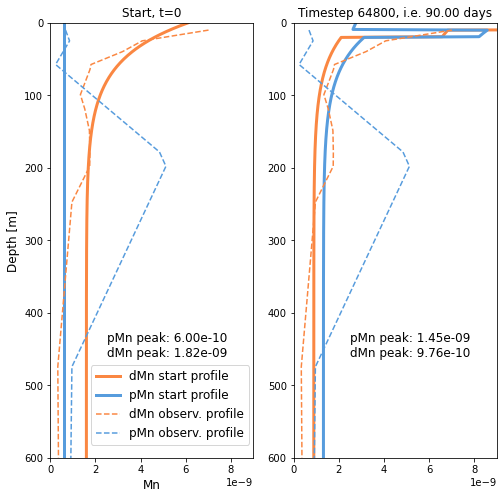

In [145]:
profile_Mn(dMn_base, pMn_base, day=90)

Options:
1) they mediate faster oxidation, i.e. k_ox is greater over ~150-250 m.
2) they mediate smaller oxidation particles that sink slower, i.e. s_ox is lower over ~150-250 m.
3) they mediate particles that are more resistant to reduction, i.e. k_red is smaller over~150-250 m.

#### Test option 1: k_ox is greater over ~150-250 m

In [164]:
dMn_bacteria15, pMn_bacteria15 = run_1d_model(days=100, opt_kox=(True,10.0)) # oxidation rate is greater

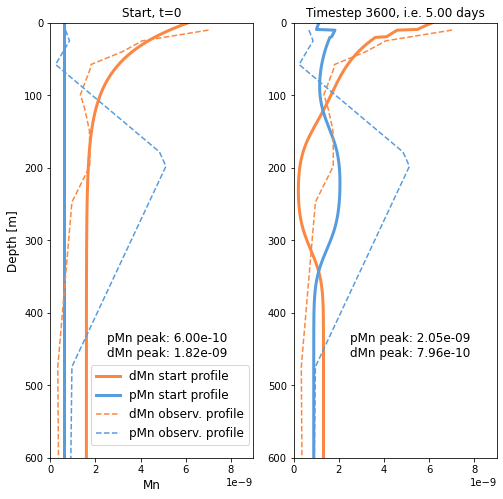

In [188]:
profile_Mn(dMn_bacteria15, pMn_bacteria15, day=5)

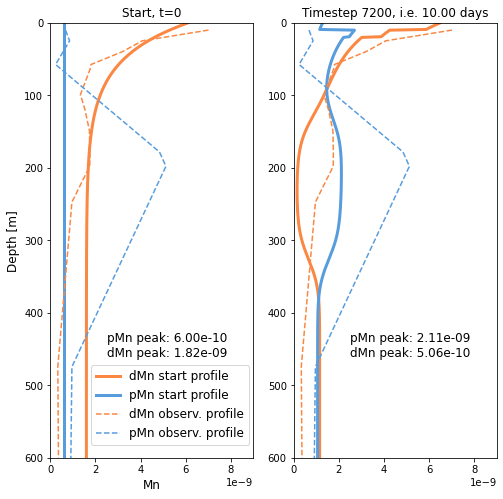

In [189]:
profile_Mn(dMn_bacteria15, pMn_bacteria15, day=10)

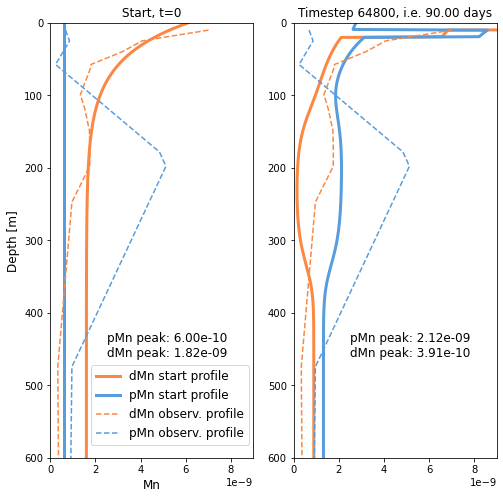

In [190]:
profile_Mn(dMn_bacteria15, pMn_bacteria15, day=90)

#### Test option 2: s_ox is lower over ~150-250 m.

In [148]:
dMn_lowsink, pMn_lowsink = run_1d_model(days=100, opt_sox=(True, 0.05)) # smaller sinking rate

In [149]:
dMn_highsink, pMn_highsink = run_1d_model(days=100, opt_sox=(True, 2.0)) # higher sinking rate

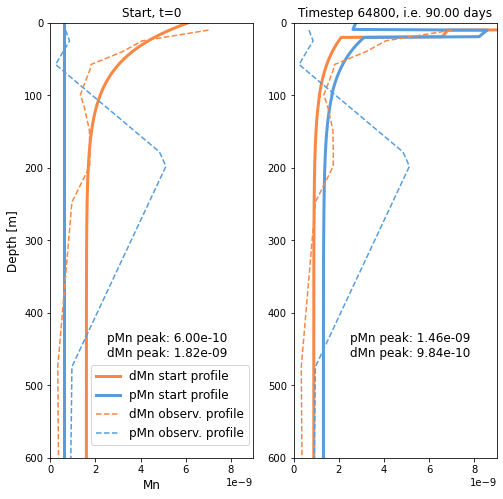

In [150]:
profile_Mn(dMn_lowsink, pMn_lowsink, day=90)

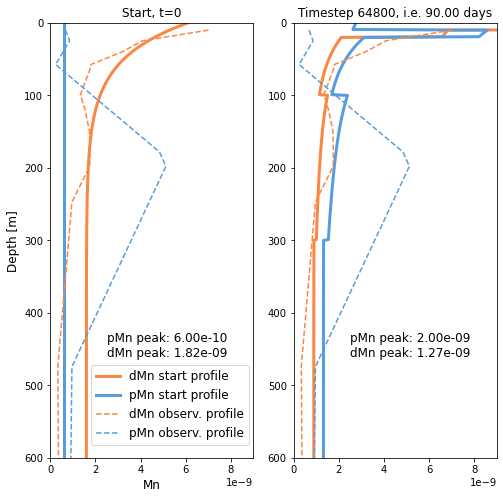

In [151]:
profile_Mn(dMn_highsink, pMn_highsink, day=90)

#### Test option 3: k_red is smaller over~150-250 m.

In [181]:
dMn_lowred, pMn_lowred = run_1d_model(days=100, opt_kred=(True,0.1)) # smaller reduction rate

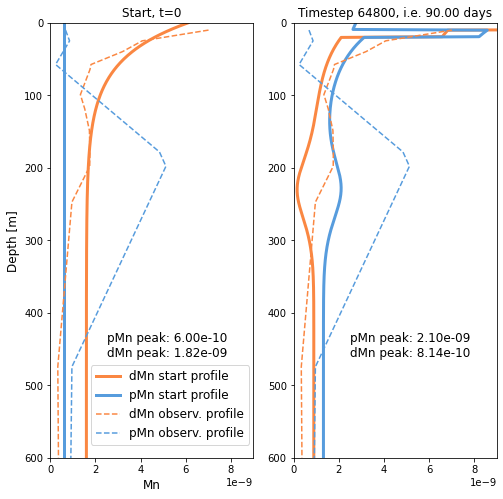

In [182]:
profile_Mn(dMn_lowred, pMn_lowred, day=90)